In [19]:
import pygplates
import pygmt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gprm import ReconstructionModel, MotionPathFeature

print(pygplates.__version__)

%load_ext autoreload
%autoreload 2



2.2.0.28
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


In [21]:
def PlotTrails(fig,Trails,color,path_times, label=None):
    for Trail in Trails:
        fig.plot(Trail[:,1], Trail[:,0], pen='1.2p,{:s}'.format(color),label=label)
        fig.plot(x=Trail[::5,1],y=Trail[::5,0],style='c0.2c',pen=color,
                 cmap='plasma',color=path_times[::5]/1000.)
        fig.plot(Trail[-1,1],Trail[-1,0],style='a0.2i', color='black')
        

AfricaPath = MotionPathFeature(seed_points=(0,10), path_times=np.arange(0.,201.,10.), reconstruction_plate_id=701)
IndiaPath = MotionPathFeature(seed_points=(30,80), path_times=np.arange(0.,201.,10.), reconstruction_plate_id=501)

Trails = AfricaPath.reconstruct_motion_path(M2016)

rates = AfricaPath.rate(M2016)

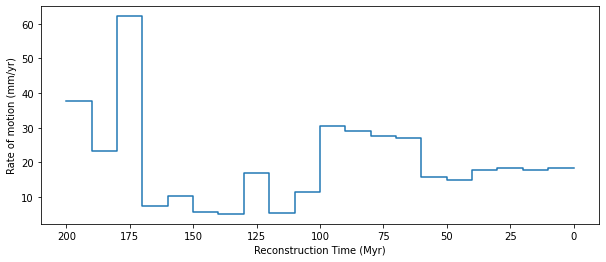

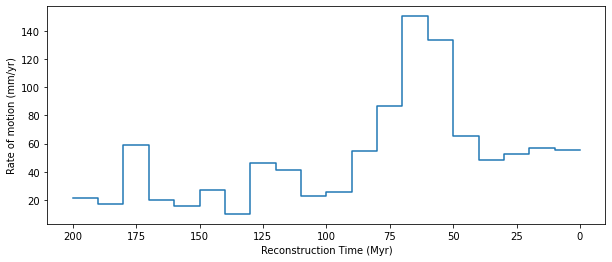

In [22]:
AfricaPath.step_plot(M2016, show=True)
IndiaPath.step_plot(M2016, show=True)


[  0.  10.  10.  20.  20.  30.  30.  40.  40.  50.  50.  60.  60.  70.
  70.  80.  80.  90.  90. 100. 100. 110. 110. 120. 120. 130. 130. 140.
 140. 150. 150. 160. 160. 170. 170. 180. 180. 190. 190. 200.] [18.48191184 18.48191184 17.6783987  17.6783987  18.48191184 18.48191184
 17.6783987  17.6783987  15.03559282 15.03559282 15.78661946 15.78661946
 27.12035738 27.12035738 27.53451215 27.53451215 29.03923095 29.03923095
 30.45730006 30.45730006 11.40387266 11.40387266  5.49868423  5.49868423
 16.92688024 16.92688024  5.11769107  5.11769107  5.71325006  5.71325006
 10.17723633 10.17723633  7.41610199  7.41610199 62.16036609 62.16036609
 23.18654229 23.18654229 37.77205287 37.77205287]


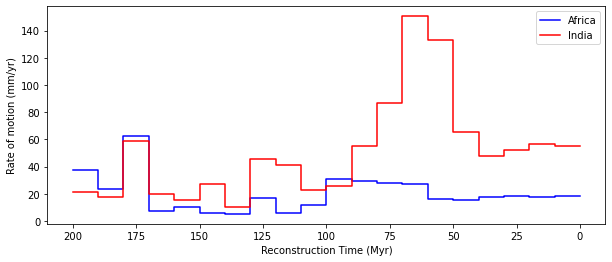

In [23]:
afr_step_times, afr_step_rates = AfricaPath.step_plot(M2016)
ind_step_times, ind_step_rates = IndiaPath.step_plot(M2016)

print(afr_step_times,afr_step_rates)

fig = plt.figure(figsize=(10,4))
plt.plot(afr_step_times, afr_step_rates, 'b', label='Africa')
plt.plot(ind_step_times, ind_step_rates, 'r', label='India')
plt.xlabel('Reconstruction Time (Myr)')
plt.ylabel('Rate of motion (mm/yr)')
plt.legend()
plt.gca().invert_xaxis()
plt.show()


In [24]:
M2016.rotation_table(asdataframe=True)


,MovingPlateID,Time,Lat,Long,Angle,FixedPlateID,Description
0,1,0.00,90.00,0.00,0.00,0,Mesozoic and Cenozoic rotation parameters are ...
1,1,200.00,90.00,0.00,0.00,0,Paleozoic rotation parameters are in the secon...
2,1,250.00,90.00,0.00,0.00,0,
3,2,0.00,90.00,0.00,0.00,901,PHS-PAC Pacific hotspot-Pacific
4,2,0.78,49.30,-49.50,-1.02,901,"PHS-PAC @REF Wessel_++_2008, @DOI""10.1029/2007..."
...,...,...,...,...,...,...,...
5552,902014,380.00,13.41,103.70,-68.44,701,"GAC-AFR @REF Domeier_Torsvik_2014 @DOI""10.10..."
5553,902014,390.00,-9.25,-75.71,64.22,701,"GAC-AFR @REF Domeier_Torsvik_2014 @DOI""10.101..."
5554,902014,400.00,-9.67,-75.75,63.49,701,"GAC-AFR @REF Domeier_Torsvik_2014 @DOI""10.101..."
5555,902014,410.00,-9.35,-75.80,64.12,701,"GAC-AFR @REF Domeier_Torsvik_2014 @DOI""10.10..."


In [25]:
target_plate_id_list = [201]

south_america_rotations = M2016.rotation_table(target_plate_id_list, asdataframe=True)

south_america_rotations

,MovingPlateID,Time,Lat,Long,Angle,FixedPlateID,Description
0,201,0.0,90.00,0.00,0.00,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
1,201,10.9,61.20,-39.70,3.68,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
2,201,20.1,58.50,-37.10,7.52,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
3,201,33.1,56.17,-33.64,13.41,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
4,201,40.1,57.10,-32.50,16.60,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
5,201,47.9,57.50,-31.20,19.70,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
6,201,55.9,61.35,-32.21,22.27,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
7,201,67.7,63.70,-33.50,25.39,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
8,201,83.5,61.88,-34.26,33.51,701,"SAM-AFR @REF Mueller_1999 @DOI""10.1016/S1874-5..."
9,201,96.0,57.46,-34.02,39.79,701,"SAM-AFR @REF Heine_++_2013 @DOI""10.5194/se-4-2..."


[  0.   10.9  20.1  33.1  40.1  47.9  55.9  67.7  83.5  96.  120.6 125.
 145.  250. ]


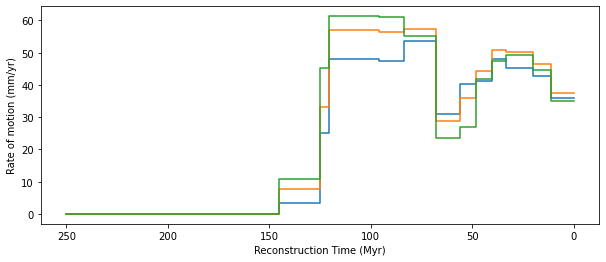

In [26]:
print(south_america_rotations.Time[:-1].unique())

#SouthAmericaPath = MotionPathFeature(seed_points=[(-10,-20),(-10,-30),(-10,-40)],
#                                     path_times=south_america_rotations.Time[:-1].unique(),
#                                     reconstruction_plate_id=201,
#                                     relative_plate_id=701)

#SouthAmericaPath = MotionPathFeature(seed_points=(-10,-20),
#                                     path_times=south_america_rotations.Time[:-1].unique(),
#                                     reconstruction_plate_id=201,
#                                     relative_plate_id=701)

SouthAmericaPath = MotionPathFeature(lats=[-10,-30,-50],longs=[-20,-30,-40],
                                     path_times=south_america_rotations.Time[:-1].unique(),
                                     reconstruction_plate_id=201,
                                     relative_plate_id=701)

SouthAmericaPath.step_plot(M2016, show=True)


(26,) (3, 26)


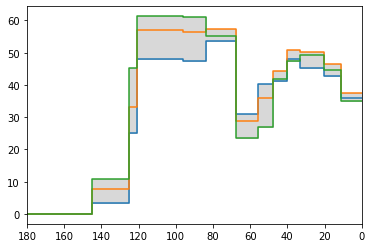

In [27]:
t,r = SouthAmericaPath.step_plot(M2016)

print(t.shape,r.shape)

plt.plot(t,np.array(r).T)
plt.fill_between(t,
                 np.array(r).min(axis=0),
                 np.array(r).max(axis=0),color='grey',alpha=0.3)
plt.xlim(180,0)
plt.show()


[12.300501730744177] [2.9042673268390136]


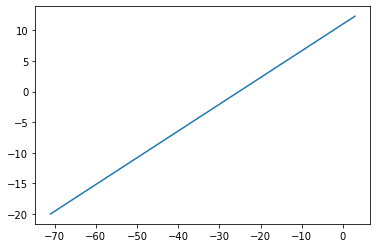

In [87]:
time_step = 1.
time_array = np.arange(0.,101.,10.)
fixed_plate = 201
moving_plate = 902

# Point at which to calculate convergence (assuming over-riding plate is fixed)
point_longitude = -71
point_latitude = -20

velocity_point = pygplates.PointOnSphere((point_latitude,point_longitude))

velocity_n = []
velocity_e = []

reconstruction_time = 30.

# Get the rotation for current time interval, and the feature's reconstruction plate ID.
equivalent_stage_rotation = M2016.rotation_model.get_rotation(
    reconstruction_time, moving_plate, reconstruction_time+time_step, fixed_plate)

# Calculate a velocity for each reconstructed point over the 1My time interval.
velocity_vector = pygplates.calculate_velocities(
    velocity_point,
    equivalent_stage_rotation,
    time_step,
    pygplates.VelocityUnits.cms_per_yr)

velocity_n_e = pygplates.LocalCartesian.convert_from_geocentric_to_north_east_down(
                        velocity_point,
                        velocity_vector)

velocity_n.append(velocity_n_e[0].get_y())
velocity_e.append(velocity_n_e[0].get_x())
    
print(velocity_n, velocity_e)
plt.plot(np.array((point_longitude,velocity_e[0])),np.array((point_latitude,velocity_n[0])))
